In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder,PowerTransformer

In [22]:
df = pd.read_csv('D:\git\Wine Quality\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
df.shape

(1599, 12)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [26]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

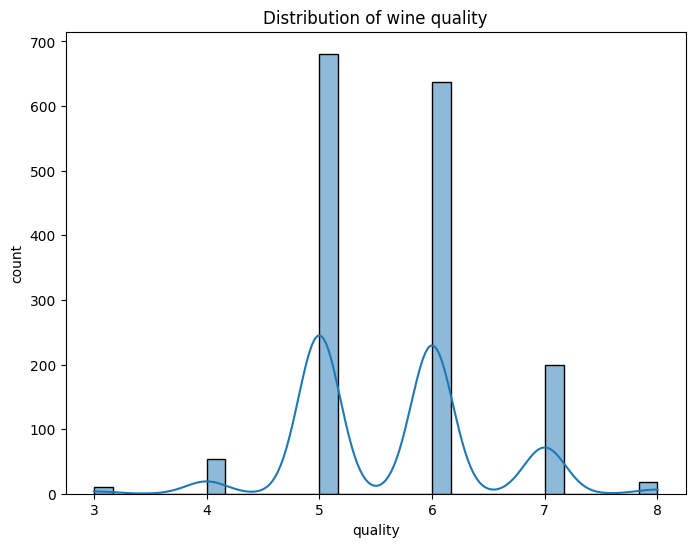

In [27]:
plt.figure(figsize=(8,6))
sns.histplot(df['quality'],kde=True)
plt.xlabel('quality')
plt.ylabel('count')
plt.title('Distribution of wine quality')
plt.show()

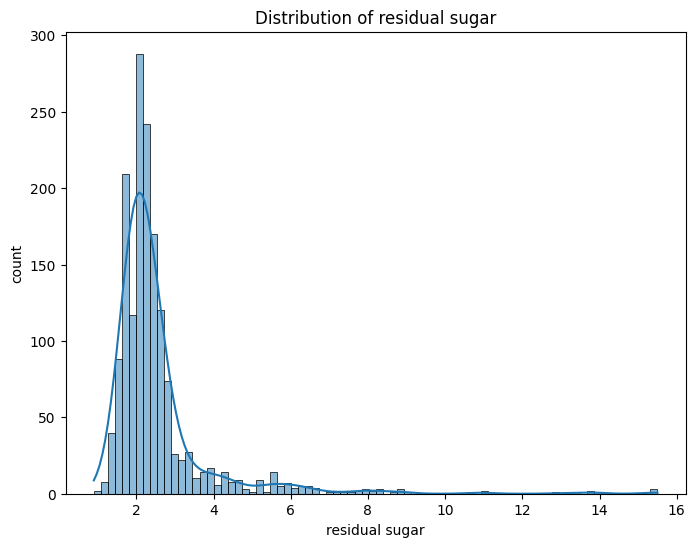

In [28]:
plt.figure(figsize=(8,6))
sns.histplot(df['residual sugar'],kde=True)
plt.xlabel('residual sugar')
plt.ylabel('count')
plt.title('Distribution of residual sugar')
plt.show()

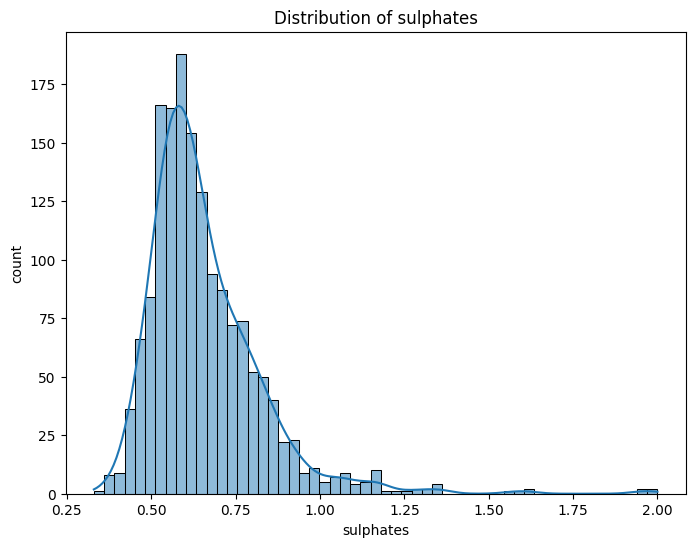

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df['sulphates'],kde=True)
plt.xlabel('sulphates')
plt.ylabel('count')
plt.title('Distribution of sulphates')
plt.show()

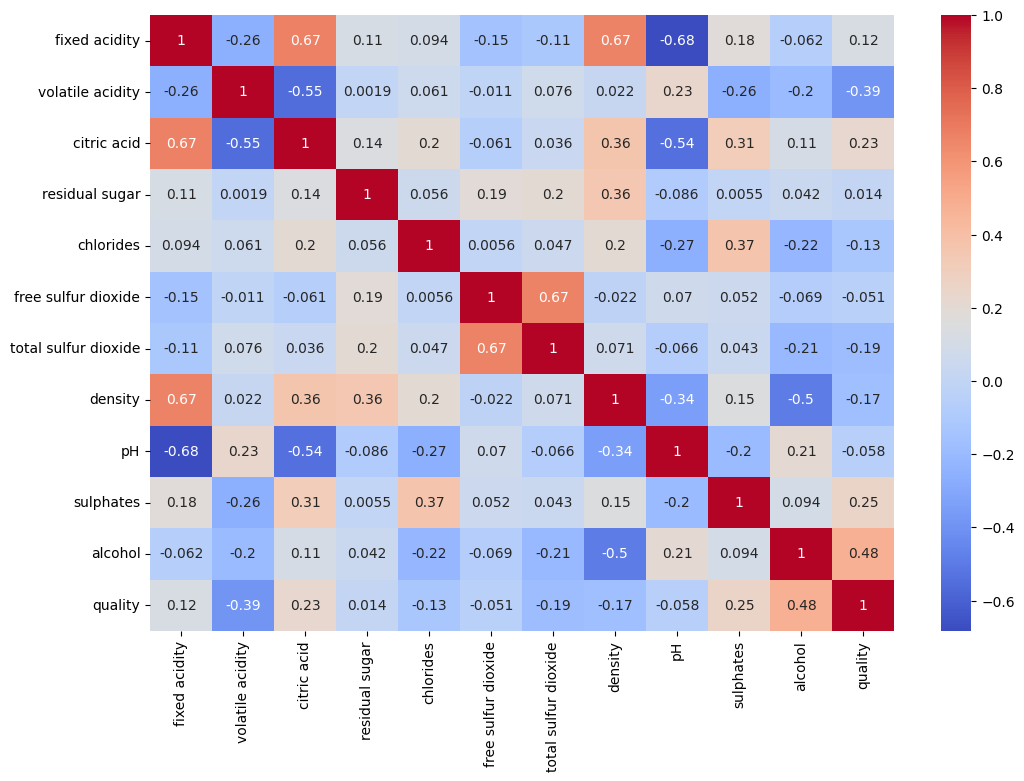

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [31]:
cols = ['fixed acidity','volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol']
pt = PowerTransformer(method = "yeo-johnson")
df[cols] = pt.fit_transform(df[cols])
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.318337
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                 0.071288
pH                      0.193683
sulphates               0.009985
alcohol                 0.112373
quality                 0.217802
dtype: float64

In [32]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,-0.442666,0.995542,0.00,-0.597145,-0.172896,-0.268045,-0.124411,0.9978,3.51,-0.581650,-1.075025,5,0
1,-0.161308,1.771299,0.00,0.556565,0.786204,0.993852,0.854954,0.9968,3.20,0.395140,-0.500860,5,0
2,-0.161308,1.269801,0.04,0.152372,0.560696,0.193450,0.540394,0.9970,3.26,0.183772,-0.500860,5,0
3,1.522582,-1.550050,0.56,-0.597145,-0.226113,0.385115,0.693699,0.9980,3.16,-0.392318,-0.500860,6,0
4,-0.442666,0.995542,0.00,-0.597145,-0.172896,-0.268045,-0.124411,0.9978,3.51,-0.581650,-1.075025,5,0


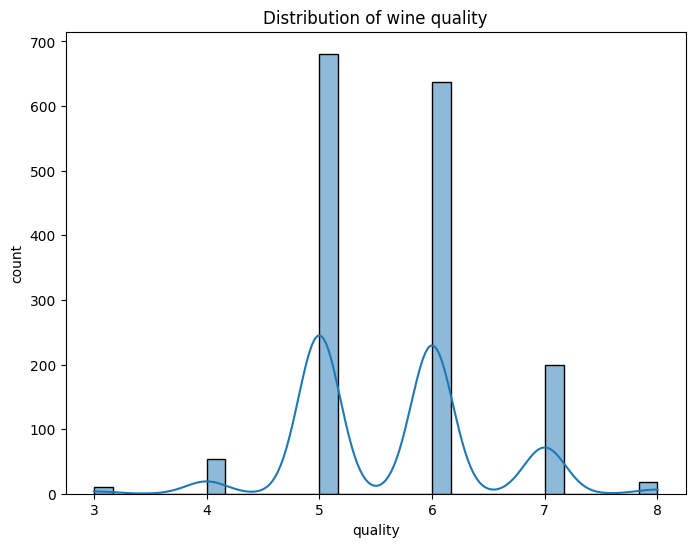

In [33]:
plt.figure(figsize=(8,6))
sns.histplot(df['quality'],kde=True)
plt.xlabel('quality')
plt.ylabel('count')
plt.title('Distribution of wine quality')
plt.show()

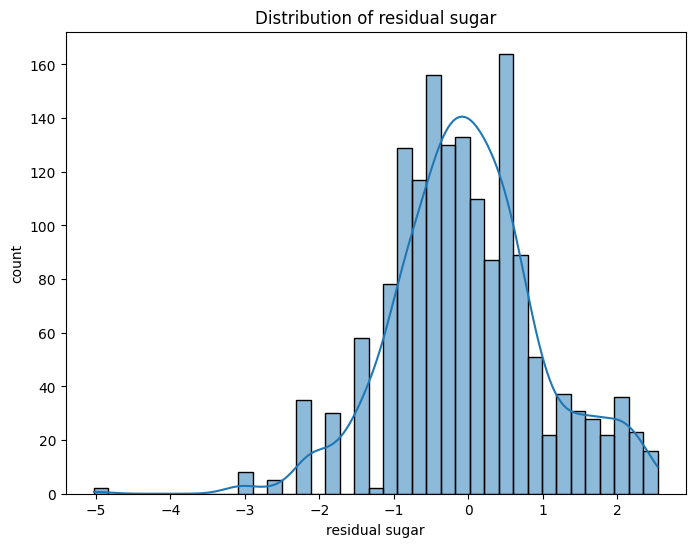

In [34]:
plt.figure(figsize=(8,6))
sns.histplot(df['residual sugar'],kde=True)
plt.xlabel('residual sugar')
plt.ylabel('count')
plt.title('Distribution of residual sugar')
plt.show()

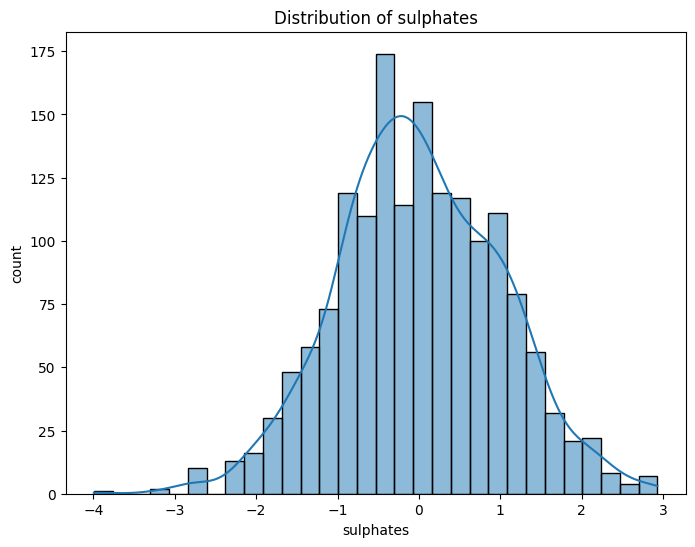

In [35]:
plt.figure(figsize=(8,6))
sns.histplot(df['sulphates'],kde=True)
plt.xlabel('sulphates')
plt.ylabel('count')
plt.title('Distribution of sulphates')
plt.show()

In [36]:
x = df.drop(['quality','quality_label'],axis=1)
y = df['quality_label']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [37]:
dt = DecisionTreeClassifier(max_depth=None,random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)
confusion_matrix = confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",confusion_matrix)

Accuracy: 0.875
Confusion matrix:
 [[255  18]
 [ 22  25]]


In [39]:
import pickle
with open('wine_quality_model.pkl','wb') as f:
    pickle.dump(dt,f)